In [1]:
# this allows the full screen to be used
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# import statements
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os

#### Warmup 1: Create a database called student_grades.db with a single table called grades

In [3]:
# establish connection to a new database
grades_conn = sqlite3.connect("student_grades.db")

# Q: When outer data structure is a dictionary, are inner data structures
#    rows or columns of the DataFrame table?
# A: columns (when outer data structure is a list, inner data structures represent rows)

df = pd.DataFrame({
    "name": [
        "Cole",
        "Cynthia",
        "Alice",
        "Seth"
    ],
    "grade": [
        "C",
        "AB",
        "B",
        "BC"
    ],
    "gpa": [
        2.0,
        3.5,
        3.0,
        2.5
    ],
    "attendance": [
        4,
        11,
        10,
        6
    ]
})

# convert the DataFrame to sql database
df.to_sql("grades", con = grades_conn, if_exists = "replace", index = False)

#### Warmup 2: What are the columns of our table? What are their datatypes?

In [4]:
df = pd.read_sql("SELECT * FROM sqlite_master", grades_conn)
print(df['sql'].iloc[0])

# name is TEXT (in Python, str)
# grade is TEXT (in Python, str)
# gpa is REAL (in Python, float)
# attendance is INTEGER (in Python, int)

CREATE TABLE "grades" (
"name" TEXT,
  "grade" TEXT,
  "gpa" REAL,
  "attendance" INTEGER
)


#### Warmup 4: What is the data in "grades" table? 
Save this to a variable called "student_grades" and display it.

In [5]:
student_grades = pd.read_sql("SELECT * FROM grades", grades_conn)
student_grades

,name,grade,gpa,attendance
0,Cole,C,2.0,4
1,Cynthia,AB,3.5,11
2,Alice,B,3.0,10
3,Seth,BC,2.5,6


#### Warmup 5: Make a scatter plot where the attendance of a student is on the x-axis and their gpa on the y-axis
Preview to upcoming topic

<AxesSubplot:xlabel='attendance', ylabel='gpa'>

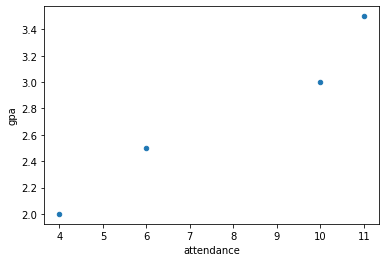

In [6]:
student_grades.plot.scatter(x = "attendance", y = "gpa")

#### Warmup 6: What is the correlation between gpa and attendance?

In [7]:
student_grades.corr()

,gpa,attendance
gpa,1.000000,0.976831
attendance,0.976831,1.000000


#### Warmup 7: Close the connection.

In [8]:
grades_conn.close()

# Lecture 35: Bar Plots

Learning Objectives:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [9]:
# Without this Jupyter notebook cannot display the "first" plot in older versions 
# of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


***Just for today's lecture, let's have import statements inside the notebook file. You should never do this when you write project code***

In [10]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for plots
# rc stands for runtime config, syntax is like a dictionary

#matplotlib.rcParams                       # show all parameters
#matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 18      # change current font size setting

## Plots from pandas Series

- matplotlib integrates with pandas, just like sqlite3 integrates with pandas
- Syntax: ```Series.plot.<PLOT_FUNCTION>(...)```

## Bar plots: From a Series
- Series indices are the x-axis labels
- Series values are the height of each bar

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

<AxesSubplot:>

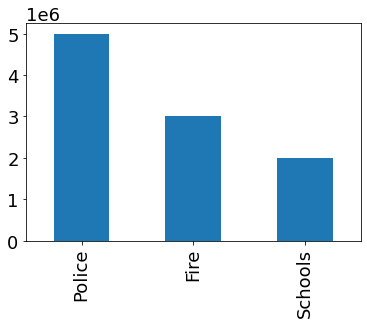

In [11]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# What are the two terminologies associated with pandas Series?
# A: index and integer position

# make a bar plot...notice the type
s.plot.bar()

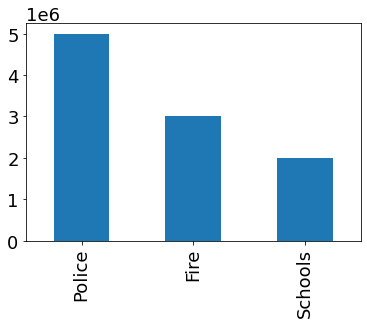

In [12]:
# if we store the returned object in a variable, we can configure the AxesSubplot
# typically the variable name used is 'ax'
ax = s.plot.bar() 

### How can we set the x-axis, y-axis labels, and title?
- plotting functions return what is called as AxesSubplot
- store into a variable and use the AxesSubplot object
- Syntax:
```
ax.set_ylabel("...")
ax.set_xlabel("...")
ax.set_title("...")
```

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

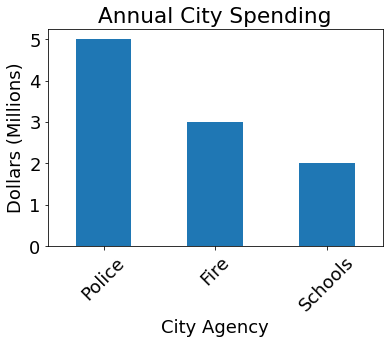

In [13]:
# What is this 1e6? Can we get rid of it?
# Instead of 1e6, divide all values in s by 1000000 (1 million)
# better plot:
ax = (s / 1000000).plot.bar()

# set the y_label to "Dollars (Millions)"
ax.set_ylabel("Dollars (Millions)")

# set the x label to "City Agency"
ax.set_xlabel("City Agency") 
# this is self-explanatory, so we will skip this for other example plots

# set the title to "Annual City Spending"
ax.set_title("Annual City Spending")

### How can we rotate the x-axis labels so that they are more readable?

In [14]:
s

Police     5000000
Fire       3000000
Schools    2000000
dtype: int64

Which aspect of the Series is the x-axis label coming from?

In [15]:
# Answer: indices

How can we extract the indices from a Series?

In [16]:
s.index

Index(['Police', 'Fire', 'Schools'], dtype='object')

Now let's use that to set x-axis tick label formatting.

- Syntax:
```
ax.set_xticklabels(<list of x-axis labels>, rotation = ???)
```

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

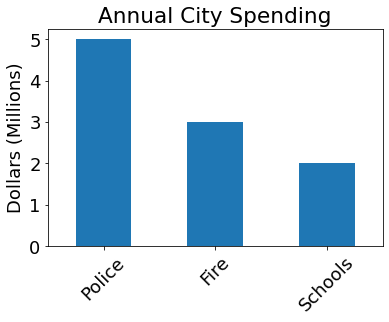

In [17]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



Text(0.5, 1.0, 'Annual City Spending')

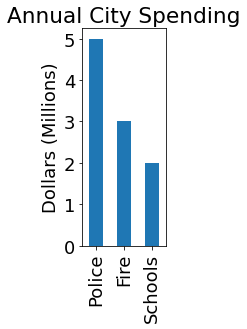

In [18]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

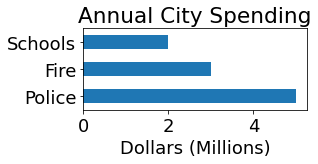

In [19]:
# paste the previous code cell here and modify
ax = (s / 1000000).plot.barh(figsize = (4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### Change bar color by using the argument color = ' ' 
- Syntax: ``` plot.bar(figsize = (width, height), color = ???)```
- 8 standard colors: r, g, b, c, m, y, k, w    (for example: ```color = 'k'```, which is black)
    - you could also specify the entire color as a string (for example: ```color = 'red'```)
- can use value of grey between 0 and 1        (for example: ```color = '0.6'```)
- can use a tuple (r, g, b) between 0 and 1      (for example: ```color = (0, .3, .4)```)

Text(0.5, 1.0, 'Annual City Spending')

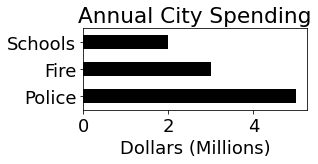

In [20]:
# color as a single char
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'k')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

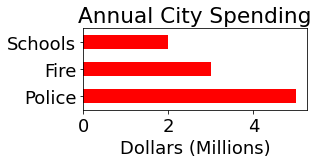

In [21]:
# color as a str
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'red')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

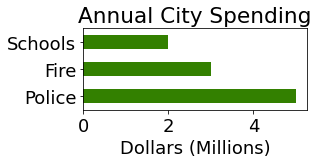

In [22]:
# color as tuple of (r, g, b)
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = (.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we mark gridlines?
- use ax.grid()

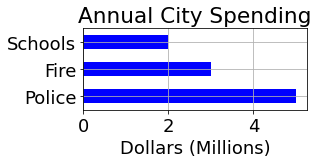

In [23]:
# copy the previous code and add grid lines
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'b')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

## Examples with the Bus Route Database

In [24]:
path = "bus.db"
# assert existence of path
assert os.path.exists(path)

# establish connection to bus.db
conn = sqlite3.connect(path)

### Find the tables in `bus.db`

In [25]:
pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table'
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."


In [26]:
pd.read_sql("""
SELECT * from
boarding
""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
...,...,...,...,...,...,...
3967,3967,6533,67,43.057329,-89.510756,16.88
3968,3968,6539,15,43.064361,-89.517233,15.53
3969,3969,6541,3,43.049934,-89.478167,2.56
3970,3970,6543,70,43.093289,-89.501726,0.11


#### What are the top routes, and how many people ride them daily?

In [27]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55
5,4,2656.99
6,15,2179.98
7,38,1955.85
8,28,1868.31
9,5,1634.69


#### Let's take the daily column out as a Series ...

<AxesSubplot:>

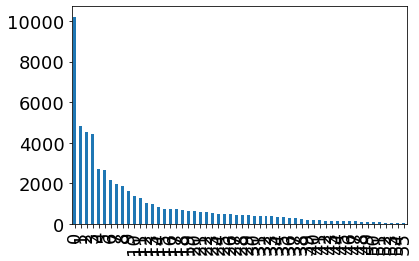

In [28]:
s = df["daily"]
s.plot.bar()

### Oops, too much data. Let's filter down to top 5 routes. How can we do that in SQL?

In [29]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


Now, plot this!

<AxesSubplot:>

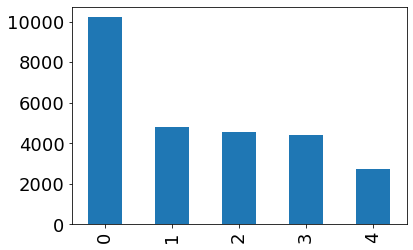

In [30]:
s = df["daily"]
s.plot.bar()

#### Huh, what exactly is route 0? Where is that coming from?
Q: Can you guess where it is coming from? 

A: It is coming from dataframe row index!

In [31]:
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


#### Let's fix that: we can use df.set_index(...)
- set_index returns a brand new DataFrame object instance

In [32]:
df = df.set_index("Route")
df

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


And now plot this...

<AxesSubplot:xlabel='Route'>

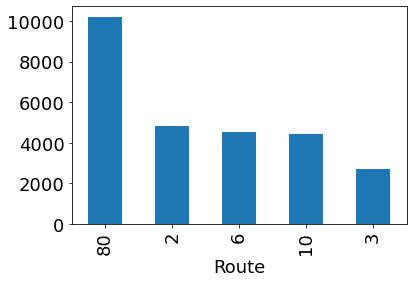

In [33]:
s = df["daily"]
s.plot.bar()

### Wouldn't it be nice to have an "other" bar to represent other routes?
- we have to now get rid of LIMIT clause
- we have to deal with other routes using pandas

In [34]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


#### We are back to plotting all route bars ...

<AxesSubplot:xlabel='Route'>

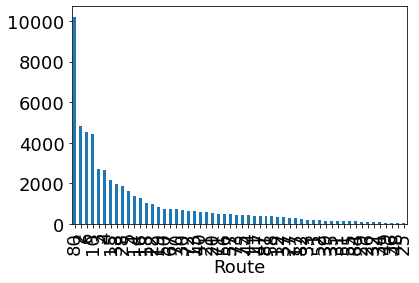

In [35]:
s.plot.bar()

### How can we slice a pandas dataframe?
- Recall that .iloc allows us to do slicing.
- For reproducing previous 5-route plot, we just need to take first 5 route details and populate into a series s.
- For the "other" part, we want all the rows in dataframe after row 5 summed up together.

In [36]:
s = df["daily"].iloc[:5]
other_boardings = df["daily"].iloc[5:].sum()
s["other"] = other_boardings
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

<AxesSubplot:xlabel='Route'>

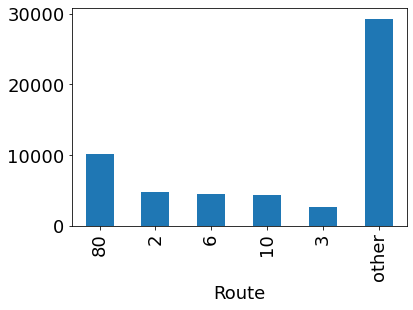

In [37]:
s.plot.bar()
# Q: Where did the xlabel come from? 
# A: It comes from "set_index call on the dataframe"

Let's fix the plot aesthetics.

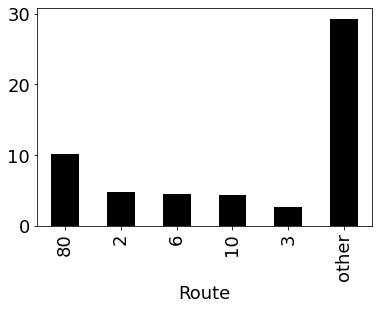

In [38]:
(s / 1000).plot.bar(color = "k")
ax.set_ylabel("Rides / Day (Thousands)")
None